# **Adaptabilidad a la educación en línea**
***
#### *Matias Ibarra - Bootcamp Data Science - The Bridge School - Año 2023*
***

<img src="../images/alumno.jpg" width ="800" height="400">

***
## Transformaciones al dataset original:

### Importación de librerias

In [27]:
# Importaciones necesarias:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
# Estilo de gráficos a utilizar:
plt.style.use('seaborn-v0_8-ticks')


### Carga de datos:

In [29]:
# Datos originales:

df = pd.read_csv('../data/raw/students_adaptability.csv')
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low



La variable target es la columna 'Adaptivity Level' que indica el nivel en el que los alumnos se adaptan a las clases online:
Los valores de target son:
* Low: adaptabilidad baja
* Moderate: adaptabilidad moderada
* High: adaptabilidad alta


### Comportamiento de la variable target

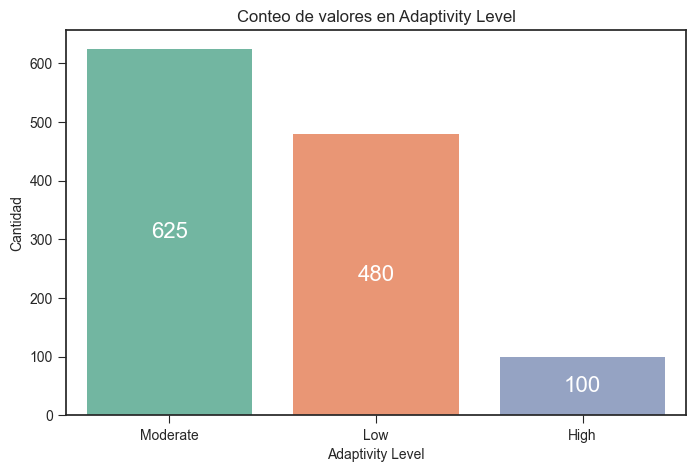

In [30]:
# Conteo de valores del target
paleta_color = sns.color_palette("Set2")
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(x=df["Adaptivity Level"], palette=paleta_color)
plt.title("Conteo de valores en Adaptivity Level")
plt.xlabel("Adaptivity Level")
plt.ylabel("Cantidad")
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=16, color='white');


La mayor cantidad de alumnos tienen una adaptabilidad moderada.

Los alumnos que se adaptan de manera alta son la minoría


### Análisis de variables:

* Gender: género del estudiante.
* Age: rango de edad.
* Education Level: nivel de la Institución Educativa.
* Institution Type: si la Institución es o no gubernamental.
* IT Student: si es o no un alumno IT.
* Location: si el alumno vive en la ciudad o no.
* Load-shedding: nivel de deslastre de carga.
* Financial Condition: condición financiera de la familia del estudiante.
* Internet Type: tipo de conexión a internet.
* Network Type: tipo de red.
* Class Duration: duración diaria de las clases.
* Self Lms: si la institución cuenta con un Learning Management System.
* Device: dispositivo utilizado en clase.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


Todas las variables son de tipo object, para entrenar el modelo será necesario convertirlas a tipo numérico.

Se observa también que no hay valores nulos.

La mayoría de las columnas contienen valores que se pueden ordenar de mayor a menor complejidad, o duración de tiempo, edad, etc.

Para estas columnas utilizaremos un label encoder.

Las columnas Gender e Institution Type no, en este caso utilizaremos dummies.

Pero antes, vemos como se distribuyen los valores de cada variable.

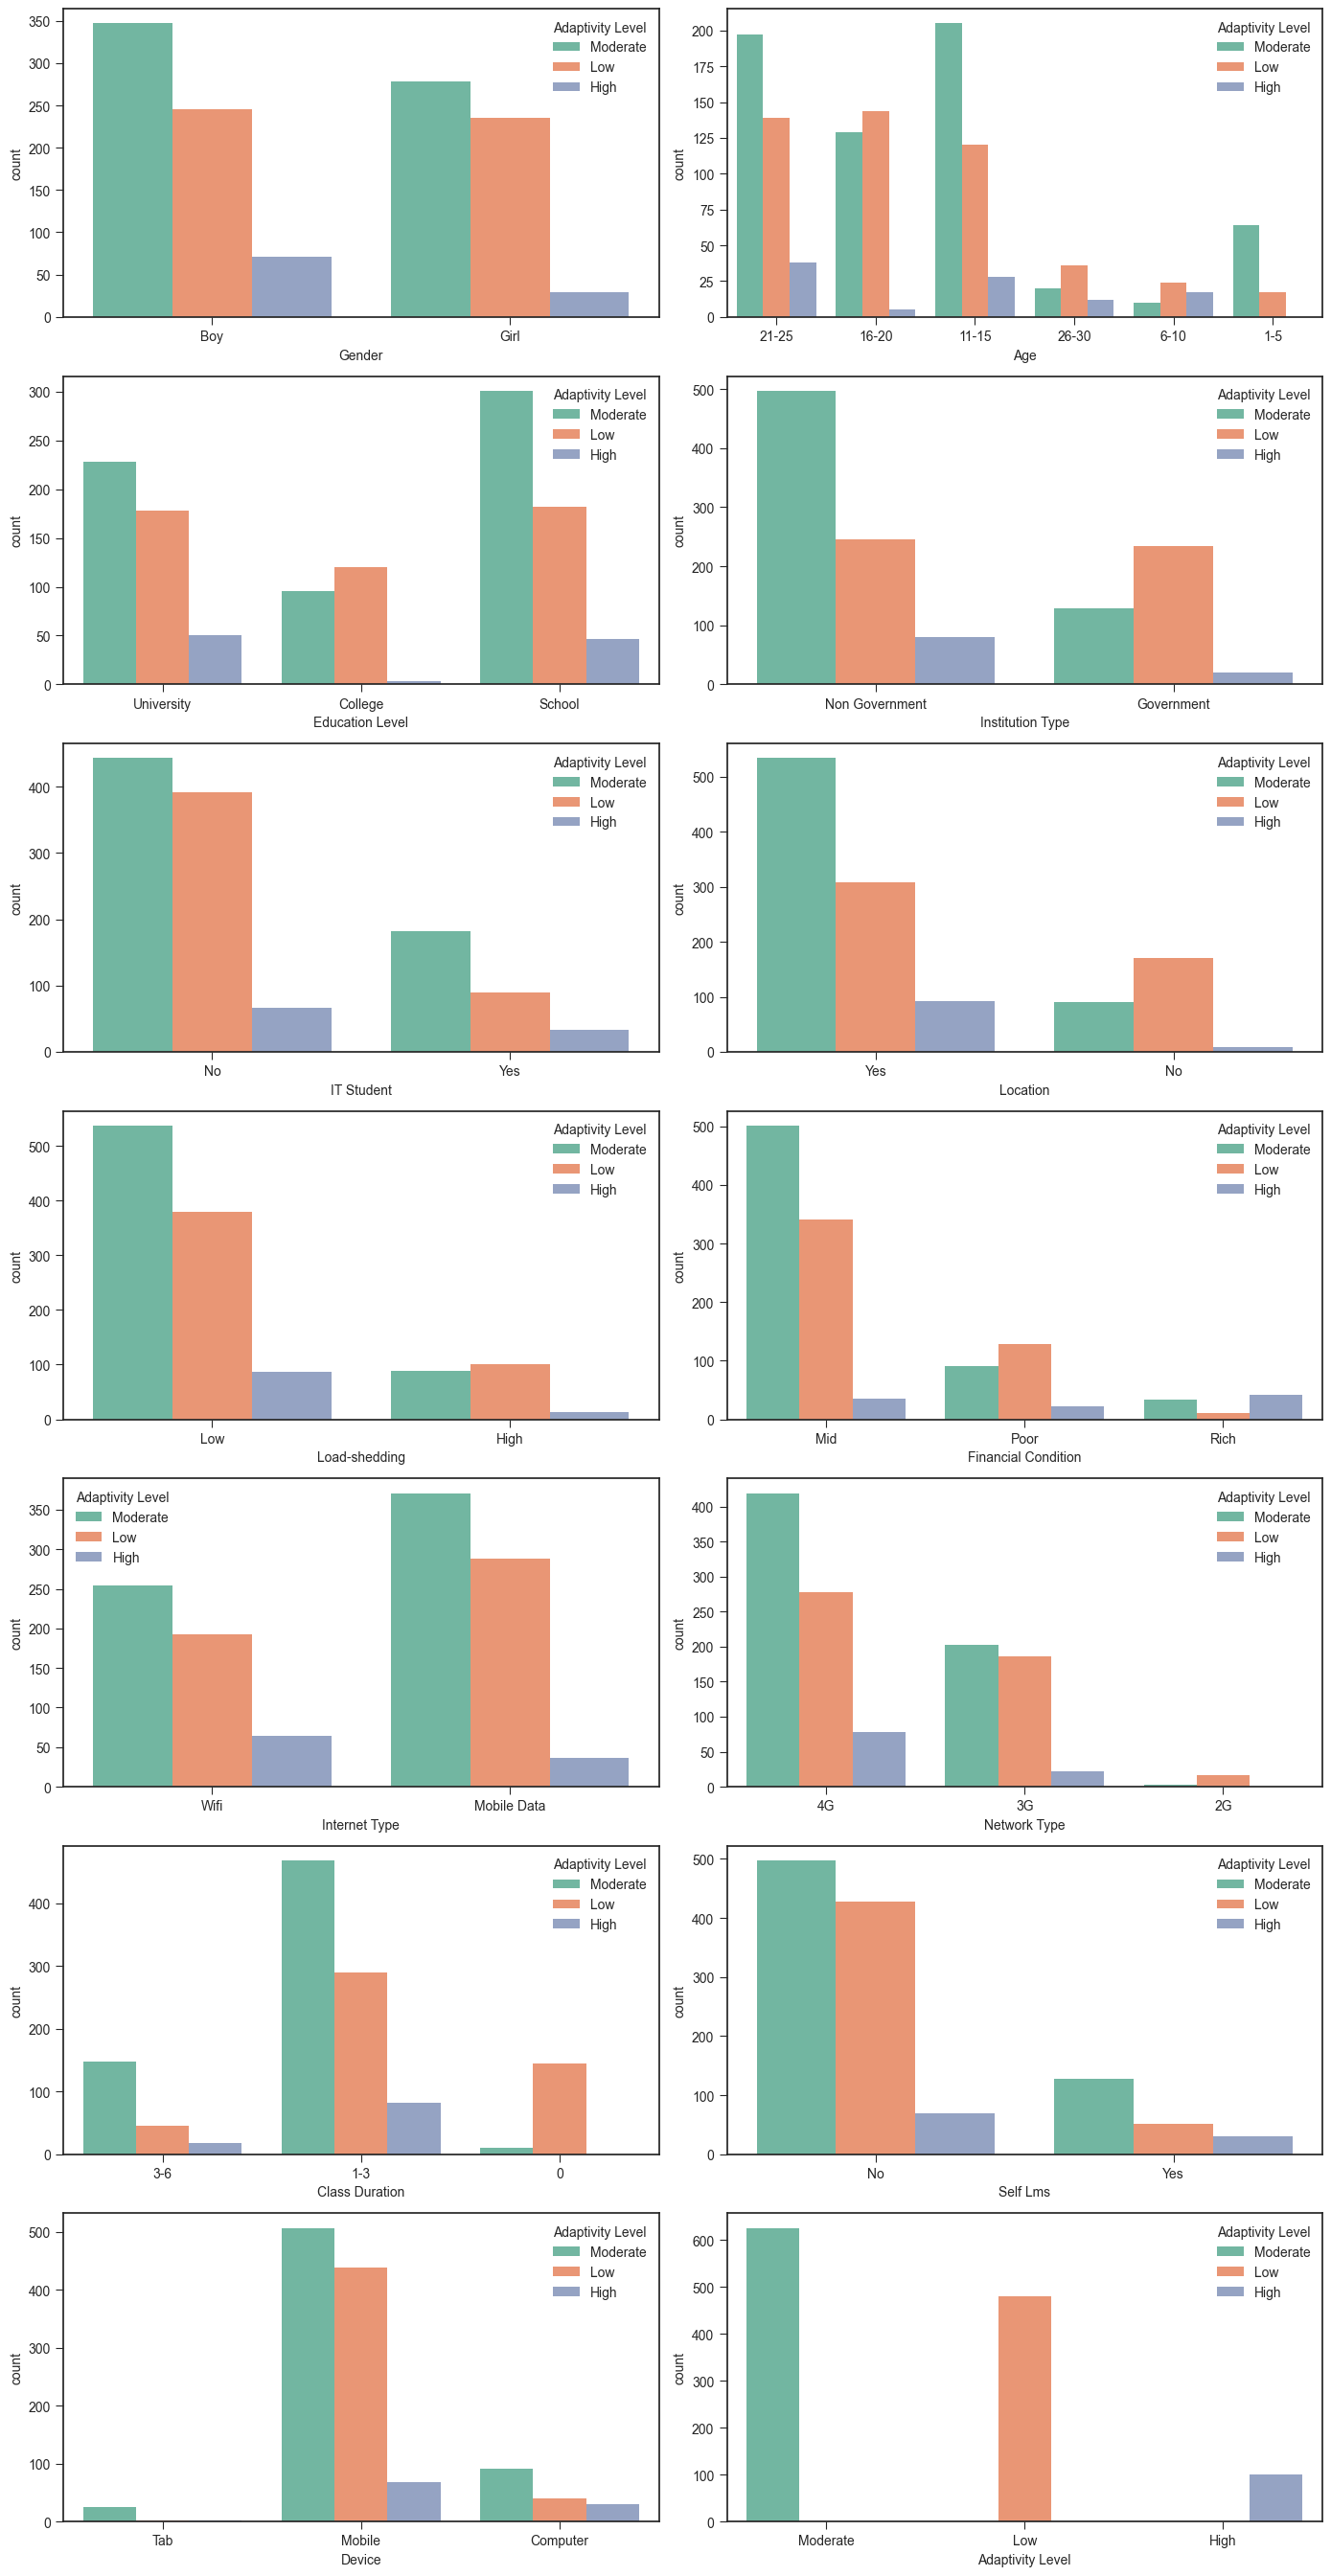

In [35]:
# Conteo de todas las variables:

f, axes = plt.subplots(7, 2, figsize=(14,27), sharex=False)
sns.countplot(data = df, x=df["Gender"], hue='Adaptivity Level', ax=axes[0, 0], palette=paleta_color)
sns.countplot(data = df,x=df["Age"], hue='Adaptivity Level', ax=axes[0, 1], palette=paleta_color)
sns.countplot(data = df,x=df["Education Level"], hue='Adaptivity Level', ax=axes[1, 0], palette=paleta_color)
sns.countplot(data = df,x=df["Institution Type"], hue='Adaptivity Level', ax=axes[1, 1], palette=paleta_color)
sns.countplot(data = df,x=df["IT Student"], hue='Adaptivity Level', ax=axes[2, 0], palette=paleta_color)
sns.countplot(data = df,x=df["Location"], hue='Adaptivity Level', ax=axes[2, 1], palette=paleta_color)
sns.countplot(data = df,x=df["Load-shedding"], hue='Adaptivity Level', ax=axes[3, 0], palette=paleta_color)
sns.countplot(data = df,x=df["Financial Condition"], hue='Adaptivity Level', ax=axes[3, 1], palette=paleta_color)
sns.countplot(data = df,x=df["Internet Type"], hue='Adaptivity Level', ax=axes[4, 0], palette=paleta_color)
sns.countplot(data = df,x=df["Network Type"], hue='Adaptivity Level', ax=axes[4, 1], palette=paleta_color)
sns.countplot(data = df,x=df["Class Duration"], hue='Adaptivity Level', ax=axes[5, 0], palette=paleta_color)
sns.countplot(data = df,x=df["Self Lms"], hue='Adaptivity Level', ax=axes[5, 1], palette=paleta_color)
sns.countplot(data = df,x=df["Device"], hue='Adaptivity Level', ax=axes[6, 0], palette=paleta_color)
sns.countplot(data = df,x=df["Adaptivity Level"], hue='Adaptivity Level', ax=axes[6, 1], palette=paleta_color)

plt.tight_layout()
plt.show();

### Feature engineering:

Transformación de los datos a valores numericos para entrenarlo y realizar predicciones.

In [23]:
df['IT Student'].sort_values(ascending=True).unique()

array(['No', 'Yes'], dtype=object)

In [24]:
# Mapeo:

mapeo_age = {'1-5': 0, '6-10': 1, '11-15': 2, '16-20': 3, '21-25': 4, '26-30': 5}
df['Age'] = df['Age'].map(mapeo_age)

mapeo_edu_level = {'School': 0, 'College': 1, 'University': 2}
df['Education Level'] = df['Education Level'].map(mapeo_edu_level)

mapeo_it = {'No': 0, 'Yes': 1}
df['IT Student'] = df['IT Student'].map(mapeo_it)

mapeo_location = {'No': 0, 'Yes': 1}
df['Location'] = df['Location'].map(mapeo_location)

mapeo_Load_shedding = {'Low': 0, 'High': 1}
df['Load-shedding'] = df['Load-shedding'].map(mapeo_Load_shedding)

mapeo_fin_cond = {'Poor': 0, 'Mid': 1, 'Rich': 2}
df['Financial Condition'] = df['Financial Condition'].map(mapeo_fin_cond)

mapeo_int_type = {'Mobile Data': 0, 'Wifi': 1}
df['Internet Type'] = df['Internet Type'].map(mapeo_int_type)

mapeo_net_type = {'2G': 0, '3G': 1, '4G': 2}
df['Network Type'] = df['Network Type'].map(mapeo_net_type)

mapeo_class = {'0': 0, '1-3': 1, '3-6': 2}
df['Class Duration'] = df['Class Duration'].map(mapeo_class)

mapeo_lms = {'No': 0, 'Yes': 1}
df['Self Lms'] = df['Self Lms'].map(mapeo_lms)

mapeo_Device = {'Mobile': 0, 'Tab': 1, 'Computer': 2}
df['Device'] = df['Device'].map(mapeo_Device)

mapeo_adap = {'Low': 0, 'Moderate': 1, 'High': 2}
df['Adaptivity Level'] = df['Adaptivity Level'].map(mapeo_adap)

# Dummies:

df_dummies = pd.get_dummies(df['Institution Type'], prefix='Institution_Type')
df_dummies = df_dummies.astype(int)
df = pd.concat([df, df_dummies], axis=1)

df_dummies = pd.get_dummies(df['Gender'], prefix='Gender')
df_dummies = df_dummies.astype(int)
df = pd.concat([df, df_dummies], axis=1)

df = df.drop(columns=['Institution Type', 'Gender'])

# Imprimo el dataset con los cambios
df

,Age,Education Level,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Institution_Type_Government,Institution_Type_Non Government,Gender_Boy,Gender_Girl
0,4,2,0,1,0,1,1,2,2,0,1,1,0,1,1,0
1,4,2,0,1,1,1,0,2,1,1,0,1,0,1,0,1
2,3,1,0,1,0,1,1,2,1,0,0,1,1,0,0,1
3,2,0,0,1,0,1,0,2,1,0,0,1,0,1,0,1
4,3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,3,1,0,1,0,1,1,2,1,0,0,0,0,1,0,1
1201,3,1,0,0,1,1,1,2,2,0,0,1,0,1,0,1
1202,2,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0
1203,3,1,0,0,0,1,1,2,1,0,0,0,0,1,0,1


Compruebo que no queden valores nulos en el dataframe modificado:

In [25]:
df.isnull().sum()

Age                                0
Education Level                    0
IT Student                         0
Location                           0
Load-shedding                      0
Financial Condition                0
Internet Type                      0
Network Type                       0
Class Duration                     0
Self Lms                           0
Device                             0
Adaptivity Level                   0
Institution_Type_Government        0
Institution_Type_Non Government    0
Gender_Boy                         0
Gender_Girl                        0
dtype: int64

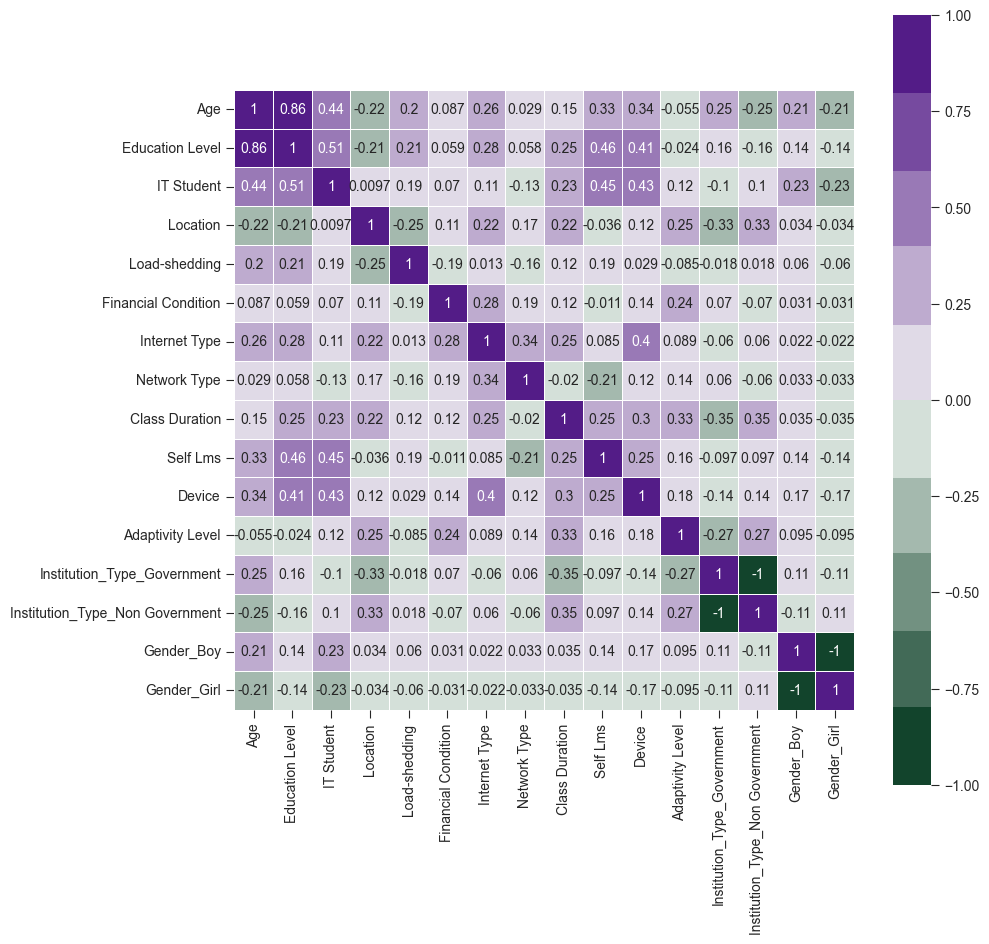

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

### Conjunto de test y train

In [ ]:
# Separamos los datos en test y train

X = df.drop(columns='Adaptivity Level')            
y = df['Adaptivity Level']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(302, 15)
(903, 15)
(302,)
(903,)



### Guardar los conjuntos por separado

In [ ]:
# Junto X e y para guardarlos en un dataframe

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
# Los guardo en sus respectivas carpetas

df.to_csv('../data/processed/processed.csv', index=False)
df_train.to_csv('../data/train/train.csv', index=False)
df_test.to_csv('../data/test/test.csv', index=False)